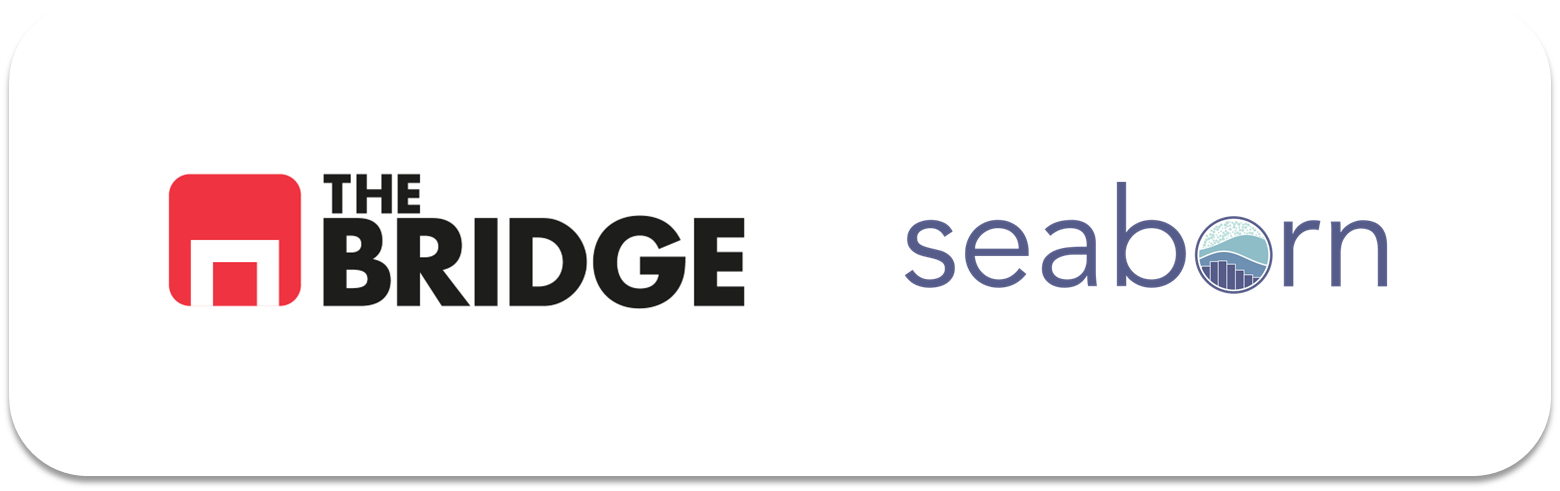

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [224]:
df = pd.read_csv("./data/california_cities.csv")
df.isnull().sum()



Unnamed: 0             0
city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [225]:
df_california_clean = df.dropna()
df_california_clean.isnull().sum()

Unnamed: 0            0
city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64

In [226]:
df_california_clean

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [227]:
def pintar_dispersion(df, columna_x, columna_y, columna_color=None, tamaño=30, escala=1):

    # 2. Preparar el tamaño de los puntos
    if isinstance(tamaño, str):  # Si tamaño es una cadena, buscar la columna
        if tamaño in df.columns:
            sizes = df[tamaño] * escala
        else:
            raise ValueError(f"La columna de tamaño '{tamaño}' no existe en el DataFrame.")
    else:
        sizes = tamaño  # Si es un número, usarlo directamente

    # 3. Crear el gráfico condicionante COLOR
    plt.figure(figsize=(10, 6))

    if columna_color is not None:
        scatter = sns.scatterplot(
            data=df,
            x=columna_x,
            y=columna_y,
            hue=columna_color,
            size=sizes,
            legend="brief",
            sizes=(20, 200)
        )
        
    else:
        scatter = sns.scatterplot(
            data=df,
            x=columna_x,
            y=columna_y,
            size=sizes,
            legend="brief",
            sizes=(20, 200)
        )

    # 4. Ajustes estéticos
    plt.title(f"Diagrama de dispersión: {columna_x} vs {columna_y}")
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.show()

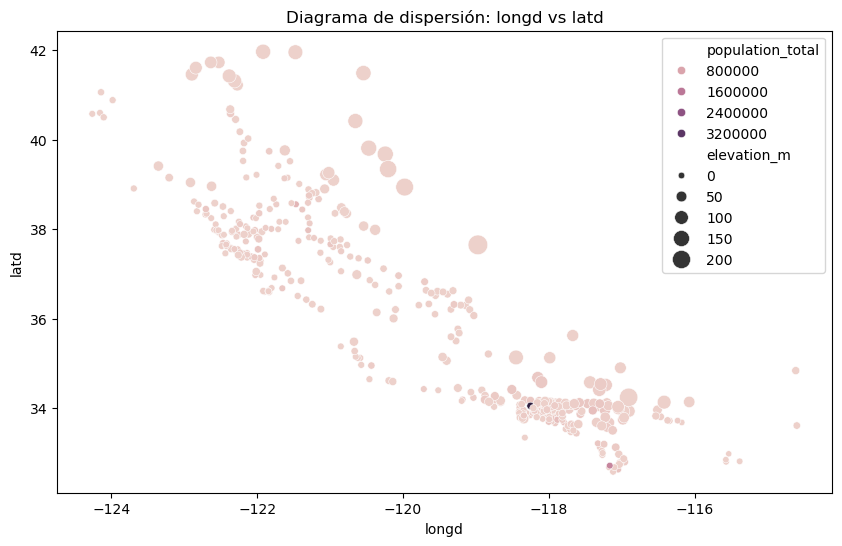

In [228]:
pintar_dispersion(
    df=df_california_clean,
    columna_x='longd',             # Longitud en X
    columna_y='latd',              # Latitud en Y
    columna_color='population_total', # Coloreamos según población
    tamaño='elevation_m',          # El tamaño de los puntos según altura
    escala=0.1                     # Reducimos un poco los tamaños para que no sean enormes
);


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

C:\Users\segur\AppData\Local\Temp\ipykernel_26144\1060906608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california_clean['log_poblacion'] = np.log10(df_california_clean['population_total'])


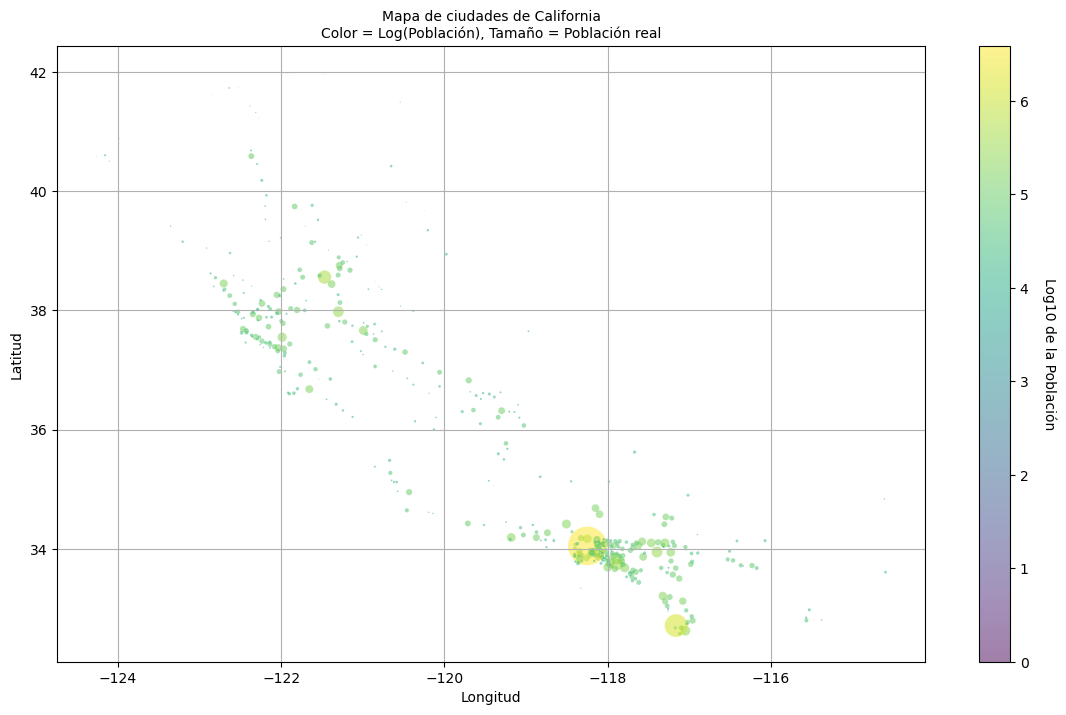

In [229]:
# 1. Crear la nueva columna logarítmica
df_california_clean['log_poblacion'] = np.log10(df_california_clean['population_total'])

# 2. Crear el gráfico mejorado
plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    x=df_california_clean['longd'],
    y=df_california_clean['latd'],
    c=df_california_clean['log_poblacion'],     # Color: log_poblacion
    s=df_california_clean['population_total'] * 0.0002,  # Tamaño de puntos escalado
    cmap='viridis',       # Paleta de colores más profesional
    alpha=0.5,            # Transparencia para que no tapen
    edgecolors='none'     # Sin bordes en los círculos
)

# 3. Agregar colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Log10 de la Población', rotation=270, labelpad=20)

# 4. Ajustes del gráfico
plt.title('Mapa de ciudades de California\nColor = Log(Población), Tamaño = Población real', fontsize=10)
plt.xlabel('Longitud', fontsize=10)
plt.ylabel('Latitud', fontsize=10)
plt.grid(True)
plt.show()

In [230]:
df_california_clean['log_poblacion'] = np.log10(df_california_clean['population_total'])
df_california_clean

C:\Users\segur\AppData\Local\Temp\ipykernel_26144\930312304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california_clean['log_poblacion'] = np.log10(df_california_clean['population_total'])


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,log_poblacion
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03,4.501949
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37,4.308137
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01,4.919544
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00,4.679637
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57,3.451326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00,3.467312
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72,3.890141
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53,4.812412
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02,4.710684


Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

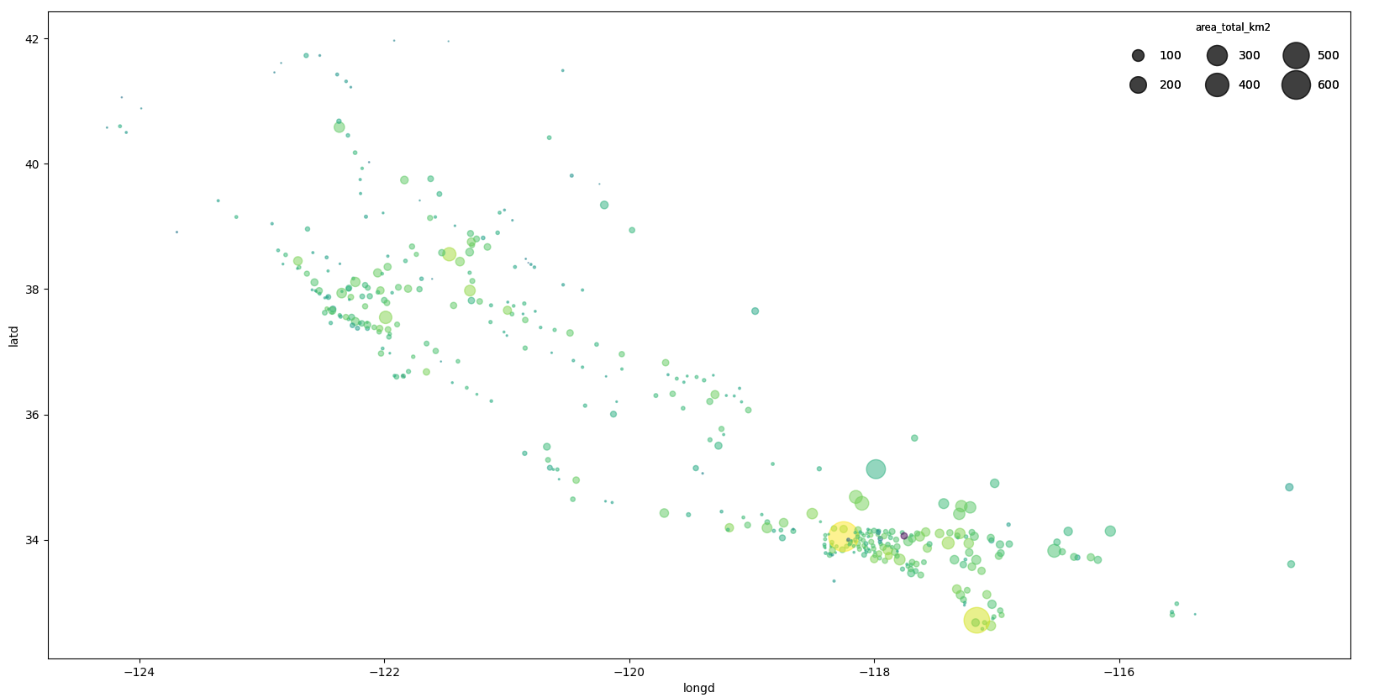

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

In [231]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
def pintar_dispersion(df, columna_x, columna_y, columna_color=None, tamaño=30, escala=1):

    if isinstance(tamaño, str):
        if tamaño in df.columns:
            sizes = df[tamaño] * escala
        else:
            raise ValueError(f"La columna de tamaño '{tamaño}' no existe en el DataFrame.")
    else:
        sizes = tamaño 

    plt.figure(figsize=(10, 6))

    if columna_color is not None:
        scatter = sns.scatterplot(
            data=df,
            x=columna_x,
            y=columna_y,
            hue=columna_color,
            size=sizes,
            legend="brief",
            sizes=(20, 200)
        )
        
    else:
        scatter = sns.scatterplot(
            data=df,
            x=columna_x,
            y=columna_y,
            size=sizes,
            legend="brief",
            sizes=(20, 200)
        )

    plt.title(f"Diagrama de dispersión: {columna_x} vs {columna_y}")
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.show()

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [233]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

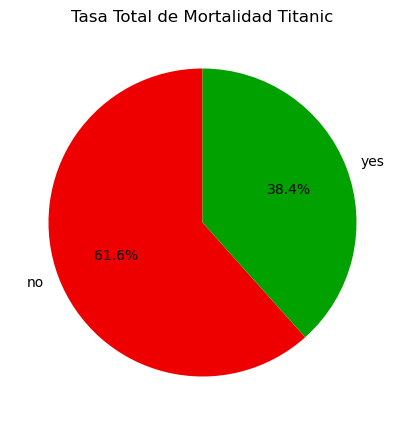

In [234]:
# Tasa Mortalidad - Gráfico de la cantidad de personas vivas vs fallecidas
# El titanic fue un accidente con una tasa de mortalidad

data = df_titanic["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (5,5))

ax.pie(data.values,
        labels=data.index,
        autopct='%.1f%%', 
        startangle= 90,
        colors=["#ef0000", "#01a100"] 
        );

ax.set_title('Tasa Total de Mortalidad Titanic')
plt.show()

#Con un tan solo un 38.4% de supervivientes.


In [235]:
total_pasajeros = len(df_titanic)
print(f"Total de pasajeros en el Titanic: {total_pasajeros}")

Total de pasajeros en el Titanic: 891


In [236]:
data_grouped = df_titanic.groupby("alive").size()

print(data_grouped)

alive
no     549
yes    342
dtype: int64


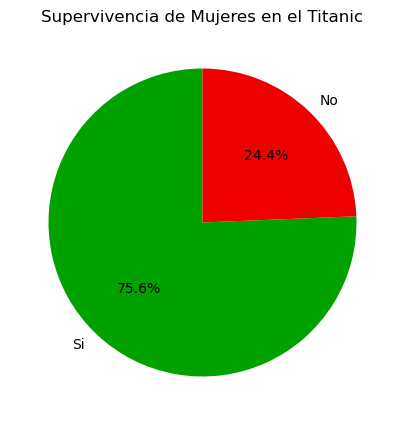

In [237]:
# Supervivientes MUJERES Y NIÑOS 
import matplotlib.pyplot as plt

# Filtrar mujeres
woman = df_titanic[df_titanic["who"] == "woman"]

# Contar sobrevivientes y fallecidas
dataw = woman["alive"].value_counts()

# Graficar pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(
    dataw.values,
    labels=["Si", "No"],  # Puedes ponerlo como gustes
    autopct='%.1f%%',  # Aquí usas autopct para mostrar el porcentaje
    startangle=90,     # Empieza el círculo a 90 grados
    colors=["#01a100", "#ef0000"]  # Rojo y verde
)

ax.set_title('Supervivencia de Mujeres en el Titanic')
plt.show()

In [238]:
woman = df_titanic[df_titanic["who"] == "woman"]
conteo_mujeres = woman["alive"].value_counts()
conteo_mujeres


alive
yes    205
no      66
Name: count, dtype: int64

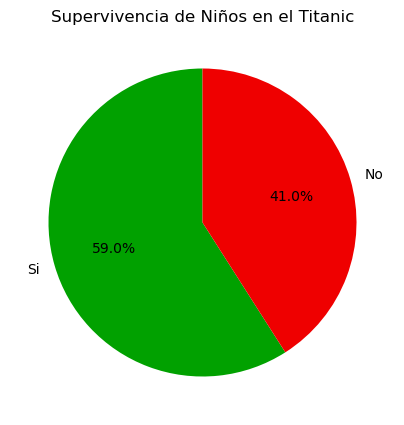

In [239]:
# Supervivientes NIÑOS 
# Filtrar niños
child = df_titanic[df_titanic["who"] == "child"]

# Contar sobrevivientes y fallecidas
datac = child["alive"].value_counts()

# Graficar pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(
    datac.values,
    labels=["Si", "No"],  # Puedes ponerlo como gustes
    autopct='%.1f%%',  # Aquí usas autopct para mostrar el porcentaje
    startangle=90,     # Empieza el círculo a 90 grados
    colors=["#01a100", "#ef0000"]  # Rojo y verde
)

ax.set_title('Supervivencia de Niños en el Titanic')
plt.show()

In [240]:
child = df_titanic[df_titanic["who"] == "child"]
conteo_niños = child["alive"].value_counts()
conteo_niños

alive
yes    49
no     34
Name: count, dtype: int64

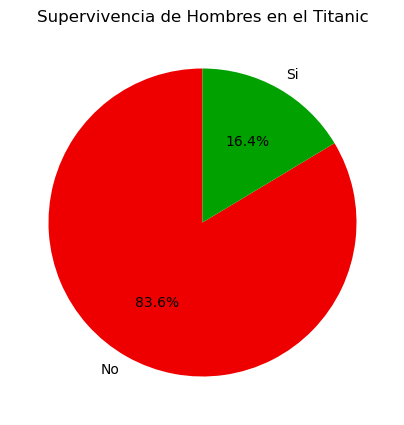

In [241]:
# Supervivientes Hombres 

man = df_titanic[df_titanic["who"] == "man"]

# Contar sobrevivientes y fallecidas
datam = man["alive"].value_counts()

# Graficar pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(
    datam.values,
    labels=["No", "Si"],
    autopct='%.1f%%', 
    startangle=90,    
    colors=["#ef0000", "#01a100"]  # Rojo y verde
)

ax.set_title('Supervivencia de Hombres en el Titanic')
plt.show()

In [242]:
hombres = df_titanic[df_titanic["who"] == "man"]
conteo_hombres = man["alive"].value_counts()
conteo_hombres

alive
no     449
yes     88
Name: count, dtype: int64

<Figure size 1000x1000 with 0 Axes>

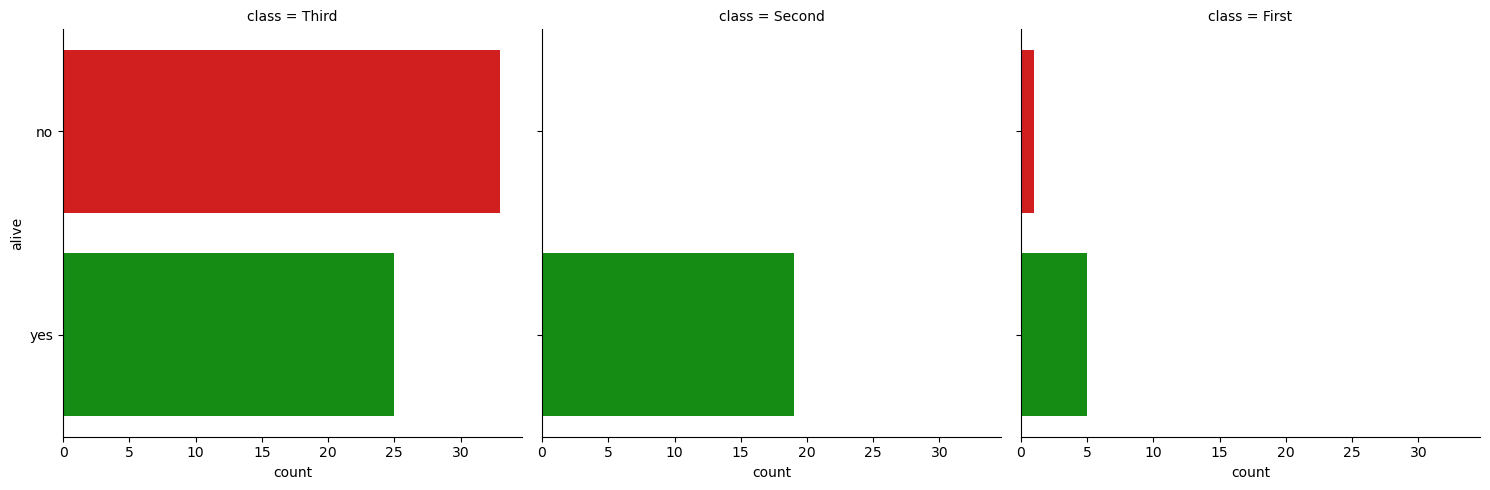

In [243]:
df_mujeres_ninos = df_titanic[df_titanic["who"].isin(["woman", "child"])]

plt.figure(figsize=(10,10))

sns.catplot(data= child,
            y= "alive", 
            col = "class", 
            hue = "alive", 
            palette=["#ef0000", "#01a100"],
            kind = "count");

<Figure size 1000x1000 with 0 Axes>

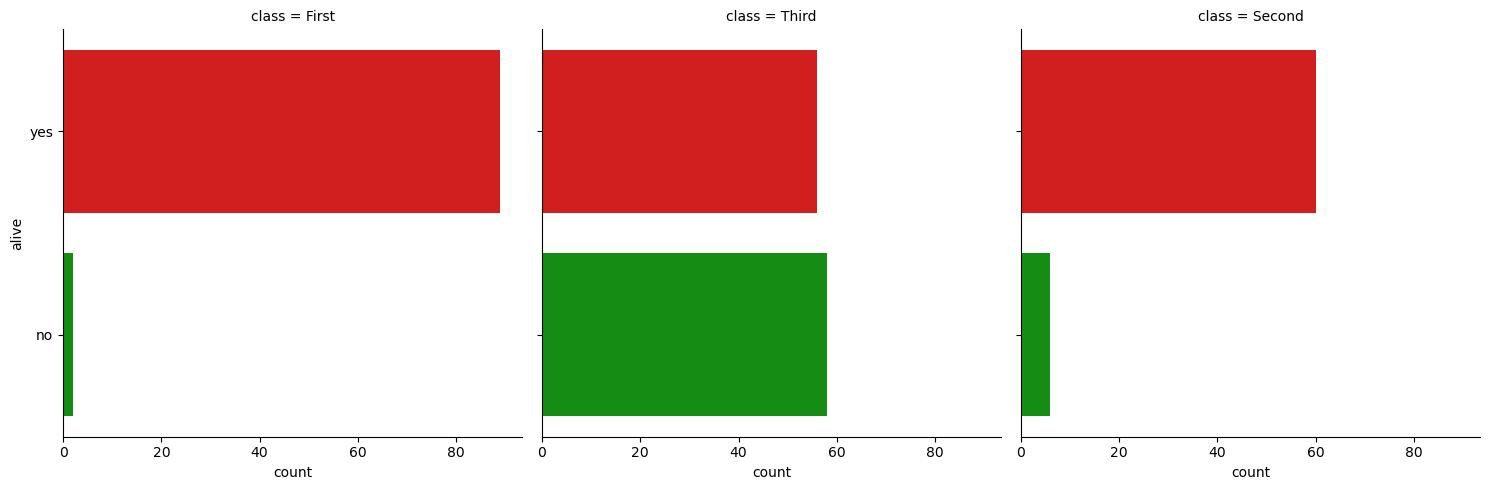

In [206]:
plt.figure(figsize=(10,10))

sns.catplot(data= woman,
            y= "alive", 
            col = "class", 
            hue = "alive", 
            palette=["#ef0000", "#01a100"],
            kind = "count");

In [244]:
df_mujeres_ninos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 1 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     354 non-null    int64  
 1   pclass       354 non-null    int64  
 2   sex          354 non-null    object 
 3   age          301 non-null    float64
 4   sibsp        354 non-null    int64  
 5   parch        354 non-null    int64  
 6   fare         354 non-null    float64
 7   embarked     352 non-null    object 
 8   class        354 non-null    object 
 9   who          354 non-null    object 
 10  adult_male   354 non-null    bool   
 11  deck         104 non-null    object 
 12  embark_town  352 non-null    object 
 13  alive        354 non-null    object 
 14  alone        354 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 39.4+ KB


<Figure size 1000x1000 with 0 Axes>

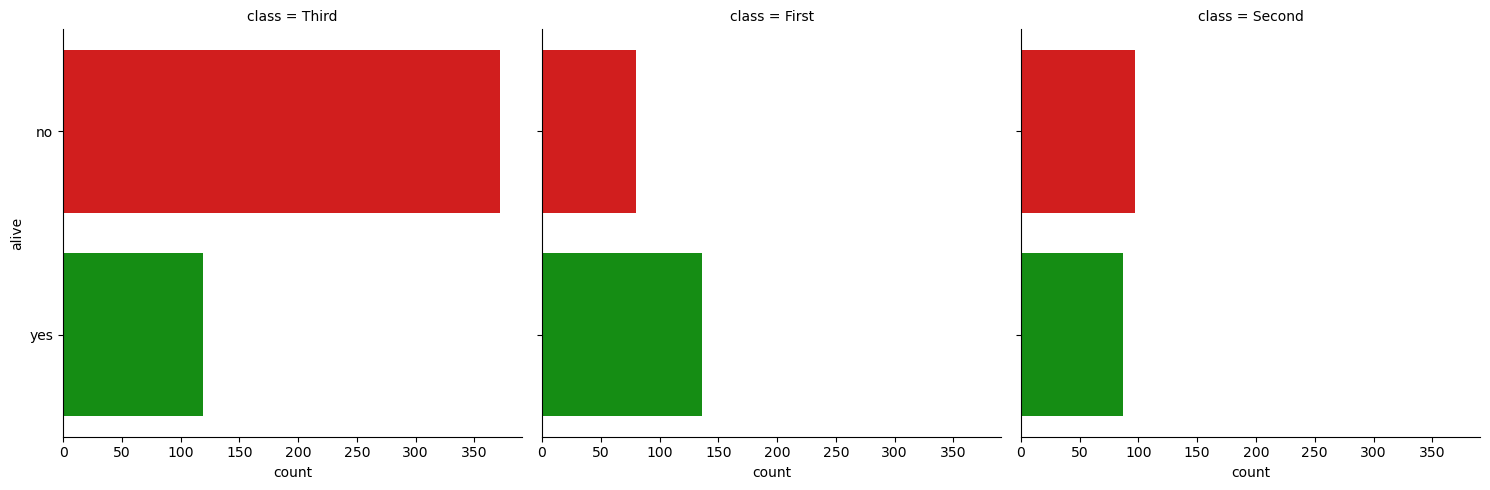

In [245]:
plt.figure(figsize=(10,10))

sns.catplot(data= df_titanic,
            y = "alive",
            col = "class", 
            hue = "alive", 
            palette=["#ef0000", "#01a100"],
            kind = "count");

In [246]:
import pandas as pd

# Crear tabla cruzada entre class y alive
tabla_cruzada1 = pd.crosstab(df_titanic["class"], df_titanic["alive"])

print(tabla_cruzada1)

alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119


In [247]:
import pandas as pd

# Crear tabla cruzada entre class y alive
tabla_cruzada = pd.crosstab(df_mujeres_ninos["class"], df_mujeres_ninos["alive"])

print(tabla_cruzada)

alive   no  yes
class          
First    3   94
Second   6   79
Third   91   81


In [248]:
normalize='index'
normalize='columns'

# Crosstab normal en porcentaje POR FILA (cada fila suma 100%)
tabla_porcentaje = pd.crosstab(
    df_titanic["class"], 
    df_titanic["alive"], 
    normalize='index'  # porcentaje por clase
)

print(tabla_porcentaje)

alive         no       yes
class                     
First   0.370370  0.629630
Second  0.527174  0.472826
Third   0.757637  0.242363


In [249]:
# DATOS
#En First Class, 62% sobrevivió (yes).
#En Third Class, 75% murió (no).

<Figure size 1000x1000 with 0 Axes>

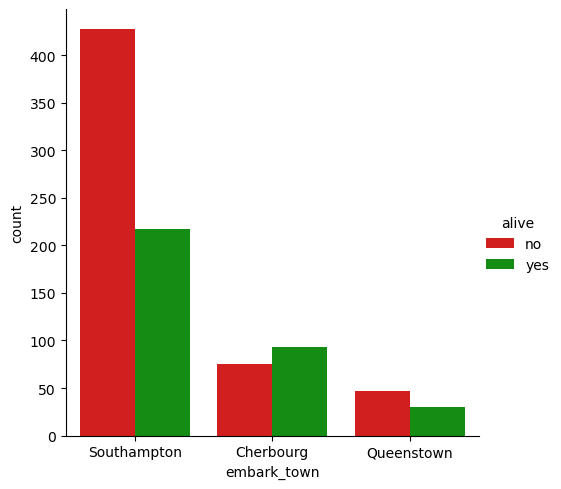

In [250]:
plt.figure(figsize=(10,10))

sns.catplot(data= df_titanic,
            x = "embark_town",
            hue = "alive", 
            palette=["#ef0000", "#01a100"],
            kind = "count");

In [251]:
import pandas as pd

# Crear tabla cruzada entre class y alive
tabla_cruzada = pd.crosstab(df_titanic["alive"], df_titanic["embark_town"])

print(tabla_cruzada)

embark_town  Cherbourg  Queenstown  Southampton
alive                                          
no                  75          47          427
yes                 93          30          217


In [252]:
normalize='index'
normalize='columns'

# Crosstab normal en porcentaje POR FILA (cada fila suma 100%)
tabla_porcentaje = pd.crosstab(
    df_titanic["embark_town"], 
    df_titanic["alive"], 
    normalize='index'  # porcentaje por clase
)

print(tabla_porcentaje)

alive              no       yes
embark_town                    
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.663043  0.336957


In [253]:
fare_mean_by_survival = df_titanic.groupby('survived')['fare'].mean()
print(fare_mean_by_survival)

fare_mean = df_titanic['fare'].mean()
print(fare_mean)



survived
0    22.117887
1    48.395408
Name: fare, dtype: float64
32.204207968574636
